# 🎨 LangGraph Visual Architecture Guide

This notebook provides visual diagrams to help you understand how LangGraph works. Each diagram illustrates key concepts and workflows.

## 📚 What You'll Learn

1. **LangGraph Architecture Overview** - Core concepts: nodes, edges, state, tools
2. **Time-Off Assistant Workflow** - A complete real-world example
3. **State Management Flow** - How data flows through the graph
4. **Interactive Diagram Generation** - Create your own diagrams

## 🔧 Setup

First, let's make sure we have the required libraries installed.

In [ ]:
# Install required packages if needed
import sys
try:
    import matplotlib
except ImportError:
    print("Installing matplotlib...")
    !{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

print("✅ Setup complete!")

## 📊 Diagram 1: LangGraph Architecture Overview

This diagram shows the fundamental building blocks of LangGraph:

- **START/END Nodes**: Entry and exit points
- **Agent Node**: The LLM that makes decisions
- **Tools Node**: External functions the agent can call
- **Human Node**: Human-in-the-loop for approvals
- **State Node**: Manages persistent data

### Key Concepts:
- **Nodes** are functions that process and transform state
- **Edges** connect nodes and define the flow
- **State** is shared data that persists across the graph
- **Human-in-the-loop** allows pausing for human input

In [ ]:
# Display the architecture diagram
display(Image(filename='images/langgraph_architecture.png'))

## 🔄 Diagram 2: Time-Off Assistant Workflow

This diagram illustrates a complete workflow for the Time-Off Assistant example used in the tutorials.

### Workflow Steps:

1. **Parse Request**: Agent analyzes the user's time-off request
2. **Check Balance**: Calls tool to get available vacation days
3. **Decision Point**: Determines if user has enough days
4. **Request Info** (if needed): Asks user for missing information
5. **Wait for Human**: Interrupt point for human response
6. **Approve/Deny**: Based on available balance
7. **Update Database**: Persist the decision
8. **Complete**: End the workflow

### Key Features:
- **Conditional routing**: Different paths based on decision logic
- **Tool calling**: Integration with external functions
- **Human interrupts**: Pause and resume for additional input
- **State persistence**: Save progress at each step

In [ ]:
# Display the workflow diagram
display(Image(filename='images/timeoff_workflow.png'))

## 💾 Diagram 3: State Management Flow

This diagram shows how state evolves as it flows through different nodes in the graph.

### State Evolution:

1. **Initial State**: Empty or default values
2. **After User Input**: Contains user message
3. **After Agent**: Includes tool calls and reasoning
4. **After Tool Execution**: Contains tool results

### Persistence Layer:

The state is automatically saved to a persistence layer (SQLite, PostgreSQL, or in-memory) at each step. This enables:

- **Checkpointing**: Save progress and resume later
- **Time-travel debugging**: View state at any point in the execution
- **Crash recovery**: Resume from last checkpoint if something fails

### State Update Pattern:

```python
class GraphState(TypedDict):
    messages: Annotated[list, operator.add]  # Automatically append new messages
    user_id: str                              # Replace with new value
    balance: int                              # Replace with new value
```

In [ ]:
# Display the state management diagram
display(Image(filename='images/state_management.png'))

## 🎨 Interactive: Generate Your Own Diagrams

You can also generate these diagrams programmatically. Here's how to create a simple custom LangGraph diagram.

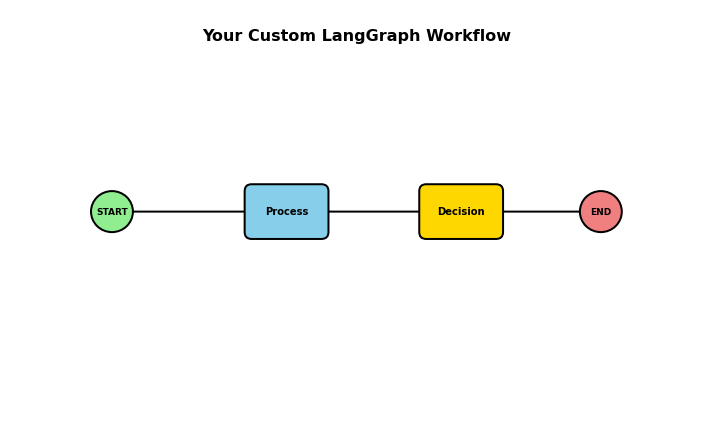

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle

def create_simple_graph_diagram():
    """Create a simple custom graph diagram"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    
    # Title
    ax.text(5, 5.5, 'Your Custom LangGraph Workflow',
            fontsize=16, weight='bold', ha='center')
    
    # Define nodes
    nodes = {
        'START': (1.5, 3),
        'Process': (4, 3),
        'Decision': (6.5, 3),
        'END': (8.5, 3)
    }
    
    colors = {
        'START': '#90EE90',
        'Process': '#87CEEB',
        'Decision': '#FFD700',
        'END': '#F08080'
    }
    
    # Draw nodes
    for name, (x, y) in nodes.items():
        if name in ['START', 'END']:
            circle = Circle((x, y), 0.3, color=colors[name],
                          ec='black', linewidth=2, zorder=3)
            ax.add_patch(circle)
            ax.text(x, y, name, ha='center', va='center',
                   fontsize=9, weight='bold', zorder=4)
        else:
            box = FancyBboxPatch((x-0.5, y-0.3), 1, 0.6,
                                boxstyle="round,pad=0.1",
                                facecolor=colors[name],
                                edgecolor='black', linewidth=2, zorder=3)
            ax.add_patch(box)
            ax.text(x, y, name, ha='center', va='center',
                   fontsize=10, weight='bold', zorder=4)
    
    # Draw arrows
    edges = [('START', 'Process'), ('Process', 'Decision'), ('Decision', 'END')]
    for start, end in edges:
        x1, y1 = nodes[start]
        x2, y2 = nodes[end]
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle='->', color='black',
                               linewidth=2, mutation_scale=20, zorder=2)
        ax.add_patch(arrow)
    
    plt.tight_layout()
    return fig

# Create and display the diagram
fig = create_simple_graph_diagram()
plt.show()

## 📝 Code Example: Defining a LangGraph

Here's how the architecture diagrams translate to actual code:

In [1]:
from typing import TypedDict, Annotated
import operator

# Define the state
class GraphState(TypedDict):
    """State that flows through the graph"""
    messages: Annotated[list, operator.add]  # Messages accumulate
    user_id: str                              # Simple value (gets replaced)
    status: str                               # Current status

# Define node functions
def agent_node(state: GraphState) -> GraphState:
    """Agent processes the request"""
    print(f"Agent processing for user: {state['user_id']}")
    return {"status": "processing"}

def tool_node(state: GraphState) -> GraphState:
    """Execute tools based on agent's decision"""
    print("Executing tools...")
    return {"status": "completed"}

# Define routing logic
def should_continue(state: GraphState) -> str:
    """Determine next node based on state"""
    if state["status"] == "processing":
        return "tools"
    return "end"

print("""\n✅ LangGraph Code Structure:

1. Define State (TypedDict) - What data flows through the graph
2. Create Node Functions - Functions that process state
3. Define Routing Logic - Conditional edges based on state
4. Build the Graph - Connect nodes and edges
5. Compile - Create executable workflow
""")


✅ LangGraph Code Structure:

1. Define State (TypedDict) - What data flows through the graph
2. Create Node Functions - Functions that process state
3. Define Routing Logic - Conditional edges based on state
4. Build the Graph - Connect nodes and edges
5. Compile - Create executable workflow



## 🔑 Key Takeaways

### Why Use LangGraph?

1. **Stateful Applications**: Maintain context across multiple interactions
2. **Complex Decision Logic**: Build conditional workflows with cycles and loops
3. **Human-in-the-Loop**: Pause for human approval or input
4. **Persistence**: Save and resume workflows at any point
5. **Observability**: Track state changes and debug workflows

### When to Use LangGraph vs LangChain?

| Use Case | LangChain | LangGraph |
|----------|-----------|----------|
| Simple question-answering | ✅ Perfect | ❌ Overkill |
| RAG (document search) | ✅ Great | ⚠️ Only if complex routing needed |
| Multi-step workflows | ⚠️ Basic chains | ✅ Excellent |
| Stateful conversations | ❌ Limited | ✅ Perfect |
| Human approval flows | ❌ Not built-in | ✅ Built-in support |
| Cyclic workflows | ❌ Not supported | ✅ Fully supported |

### Best Practices:

1. **Keep state minimal**: Only store what you need
2. **Use type hints**: Make your state TypedDict for better debugging
3. **Add checkpoints**: Enable persistence for production apps
4. **Handle errors**: Add error nodes to gracefully handle failures
5. **Test routing**: Verify conditional logic works as expected

## 🚀 Next Steps

Now that you understand the architecture, explore these notebooks:

1. **[Demo_2_Langgraph_Fundamentals.ipynb](Demo_2_Langgraph_Fundamentals.ipynb)** - Build your first LangGraph workflow
2. **[Demo_3_Langchain_CreateAgent.ipynb](Demo_3_Langchain_CreateAgent.ipynb)** - Use pre-built agents with LangGraph
3. **[Demo_5_Multi_Agent_Systems.ipynb](Demo_5_Multi_Agent_Systems.ipynb)** - Coordinate multiple agents

## 📚 Additional Resources

- [LangGraph Documentation](https://langchain-ai.github.io/langgraph/)
- [LangGraph Tutorials](https://langchain-ai.github.io/langgraph/tutorials/)
- [Example Applications](https://github.com/langchain-ai/langgraph/tree/main/examples)

## 🎨 Bonus: Generate All Diagrams

Run this cell to regenerate all diagrams from the Python script.

In [ ]:
# Import the diagram generation functions
import sys
sys.path.append('.')

# Run the diagram generator
!python langgraph_diagram.py

print("\n✅ All diagrams regenerated successfully!")
print("\nYou can now scroll up to view the updated diagrams.")